# Reading Aid Project

## Module 1: Fetching and Conversion of Image File 

### ~Opening Image via inbuilt tkinter file dialog library

In [1]:

from tkinter import *
from tkinter.filedialog import askopenfilename
root = Tk()
root.withdraw()
file_path = askopenfilename()
print(file_path)
root.destroy()

C:/Users/jayas/Desktop/OCR/data/outputmini.jpg


### ~Converion of Image using Pillow library

In [2]:
import cv2
import pyttsx3
import pytesseract
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
image_file=file_path
if(file_path[-4:]=='.jpg'):
    im=Image.open(file_path)
    im=im.convert('RGB')
    im.save("jpg_image.jpg")
    img=cv2.imread("C:/Users/jayas/Desktop/OCR/data/outputmini.jpg")
else:
    img=cv2.imread(image_file)

### ~display function 

In [3]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]

    figsize = width / float(dpi), height / float(dpi)

    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

 
    ax.axis('off')

 
    ax.imshow(im_data, cmap='gray')

    plt.show()

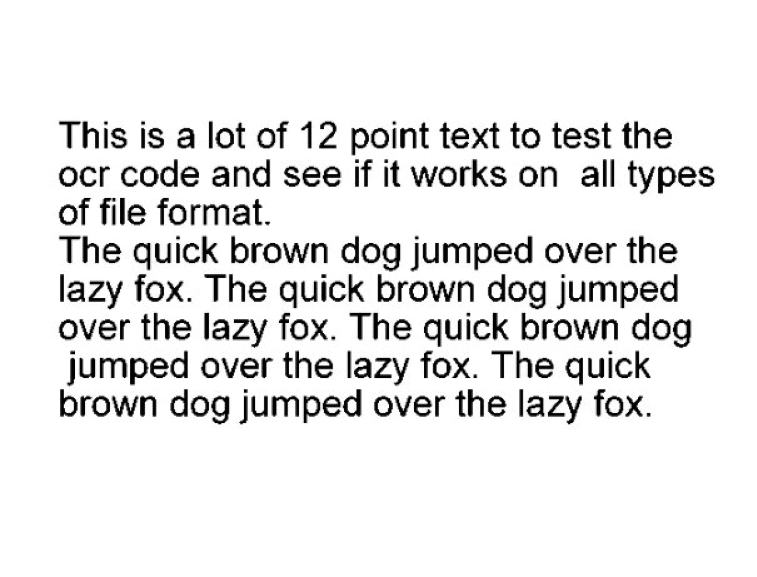

In [4]:
display(image_file)

## Module 2: Image Preprocessing

### ~Image Inversion using bitwise_not operation

In [5]:

inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/outputmini2.png ", inverted_image)


True

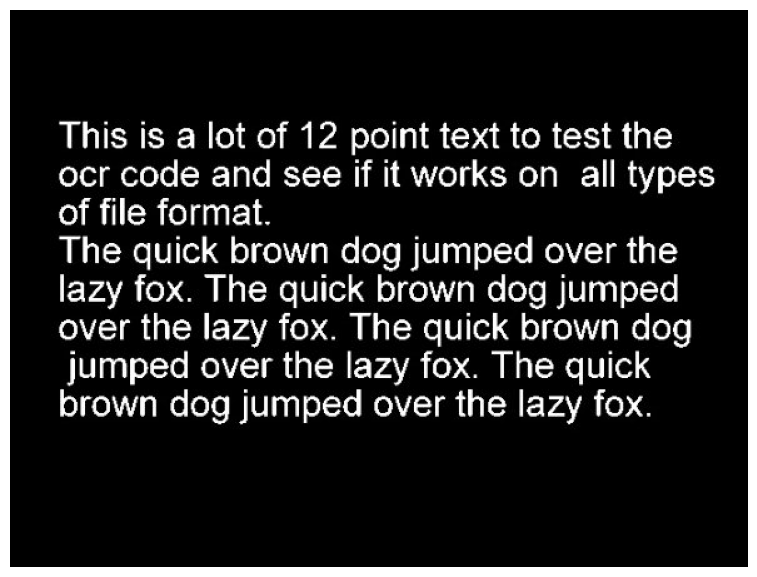

In [6]:
display("temp/outputmini2.png")

### ~grayscale function 

In [7]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg",gray_image)

True

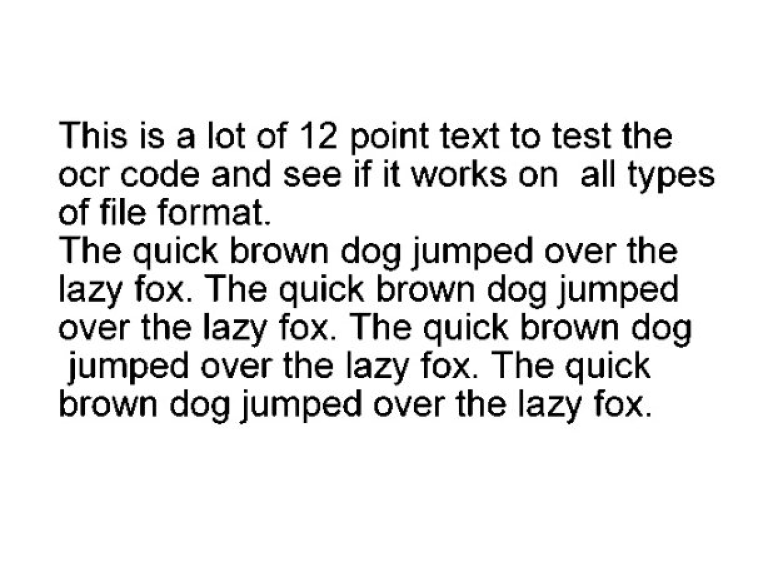

In [9]:
display("temp/gray.jpg")

### ~B/W Conversion

In [10]:
thresh, im_bw=cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

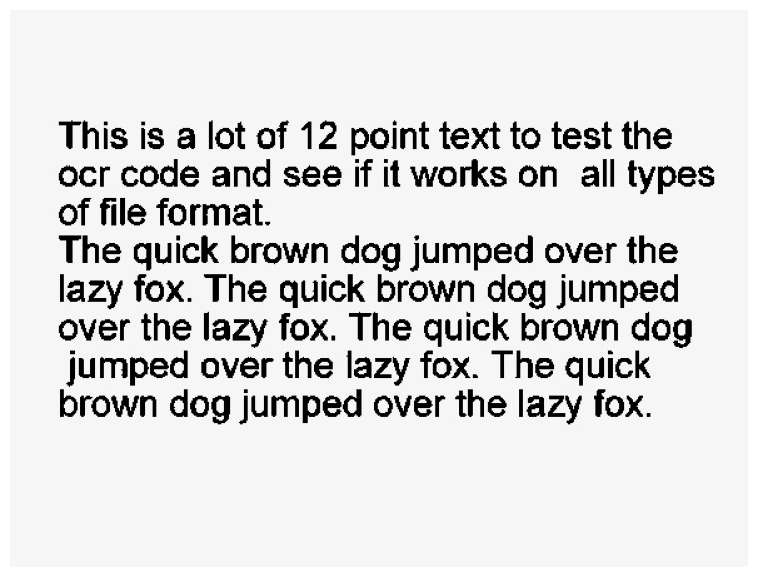

In [11]:
display("temp/bw_image.jpg")

### ~Removing noise from Image

In [12]:
def noise_removal(image):
    kernel=np.ones((1,1), np.uint8)
    image=cv2.dilate(image, kernel, iterations=1)
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image=cv2.medianBlur(image, 3)
    return(image)
    

In [13]:
no_noise=noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

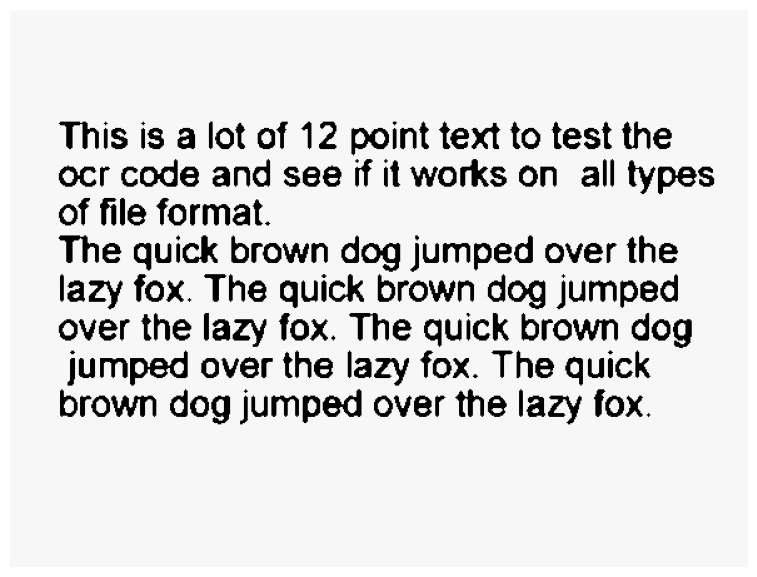

In [14]:
display("temp/no_noise.jpg")

### ~Image Erosion 

In [15]:
def thinning(image):
    image=cv2.bitwise_not(image)
    kernel=np.ones((2,2) ,np.uint8)
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return (image)
    

In [16]:
eroded_image=thinning(no_noise)
cv2.imwrite("temp/eroded_image.jpg",eroded_image)

True

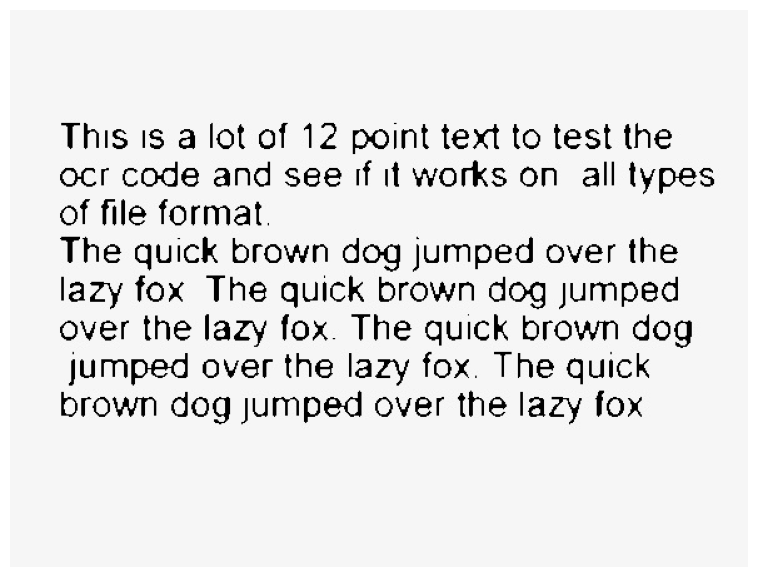

In [17]:
display("temp/eroded_image.jpg")

### ~Image Dilation 

In [18]:
def thickening(image):
    image=cv2.bitwise_not(image)
    kernel=np.ones((2,2) ,np.uint8)
    image=cv2.dilate(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return (image)

In [19]:
dilated_image=thickening(no_noise)
cv2.imwrite("temp/dilated_image.jpg",dilated_image)

True

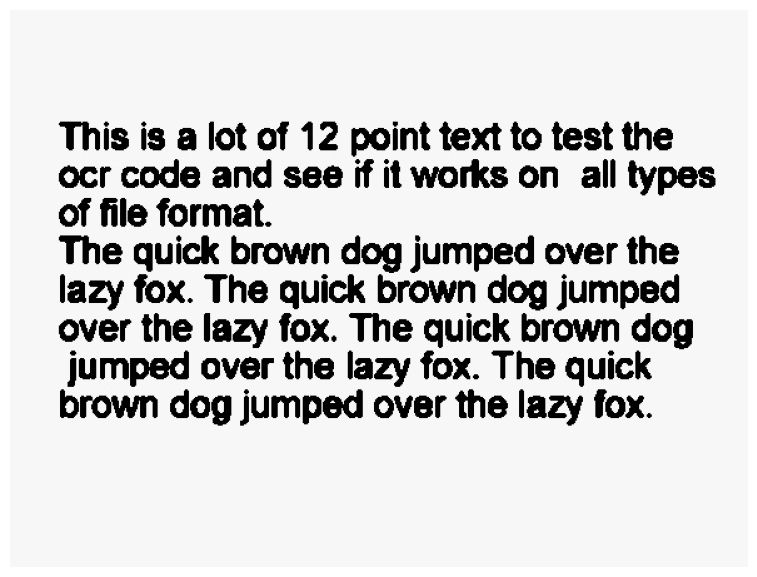

In [20]:
display("temp/dilated_image.jpg")

### ~Removal of Unwanted Borders

In [21]:
color=[255, 255, 255]
top, bottom, left, right=[150]*4
image_with_border=cv2.copyMakeBorder(no_noise, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg",image_with_border)

True

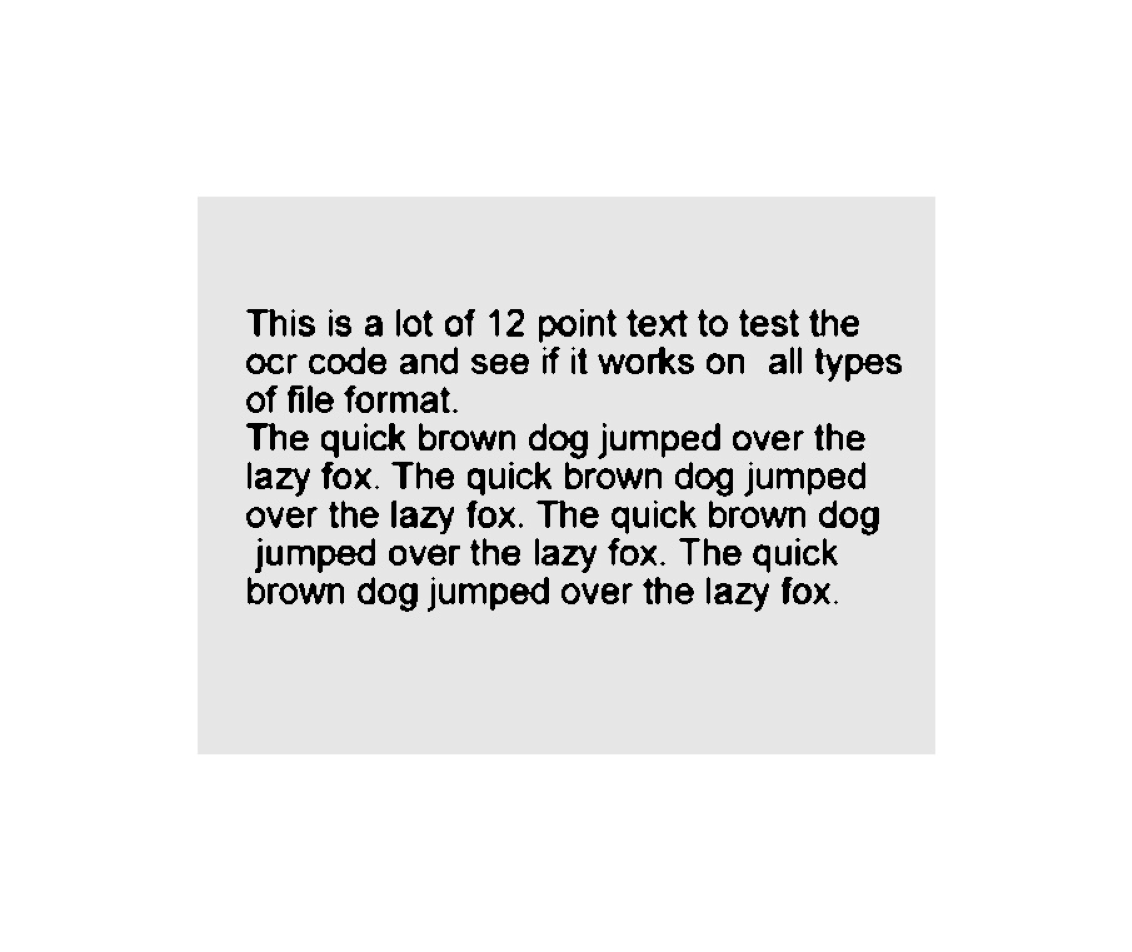

In [22]:
display("temp/image_with_border.jpg")

## Module 3: Optical Character Recognition using Tesseract Library 

### ~Converting Image to String 

In [23]:
processed_image="temp/image_with_border.jpg"
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
img=Image.open(processed_image)
ocr_result=pytesseract.image_to_string(img)
print(ocr_result)



This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


### ~Printing the Results

In [24]:
ocr_result.strip()
print(ocr_result)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


## Module 4: Conversion Text to Speech of OCR Results  

### ~Text to Speech using tts library of python

In [25]:
text_speech=pyttsx3.init()
text_speech.say(ocr_result)
text_speech.runAndWait()
text_speech.stop()